# Stochastic gene regulatory networks

Here we use the code of the notebook **STATES_CODE.R**. The libraries needed are *rlist, igraph, gtools, markovchain, data.table, RColorBrewer*. The genes are made through gen class, it's possible to introduce *n* genes with the unique condition of having only two states for each gene: Activated or degraded. All the code works in this notebook calling only one function **complete_simulation**.

Here we are goint to show an example with three genes.

In [1]:
getwd()

[1] "C:/Users/JULIETH LOPEZ/Documents/CURE/Stochastic gene regulatory networks"

In [2]:
dir()

[1] "APLICATION.ipynb"  "Rcpp_1.0.2.tar.gz" "README.md"        
[4] "STATES_CODE.R"

In [3]:
packageVersion("Rcpp")

[1] '1.0.6'

In [19]:
source('STATES_CODE.R')

In [20]:
###############################################################
#Here, we define each gene.

gen_A = gen(name="A",
            activate_list = list("B","C"),
            prob_activation = 0.1,
            prob_degradation = 0.2)

gen_B = gen(name="B",
            activate_list = list("C"),
            inhibit_list = list("A"),
            prob_activation = 0.5,
            prob_degradation = 0.9)

gen_C = gen(name="C",
            prob_activation = 0.3,
            prob_degradation = 0.5)

In [21]:
input_gen_list = list(gen_A, gen_B, gen_C)

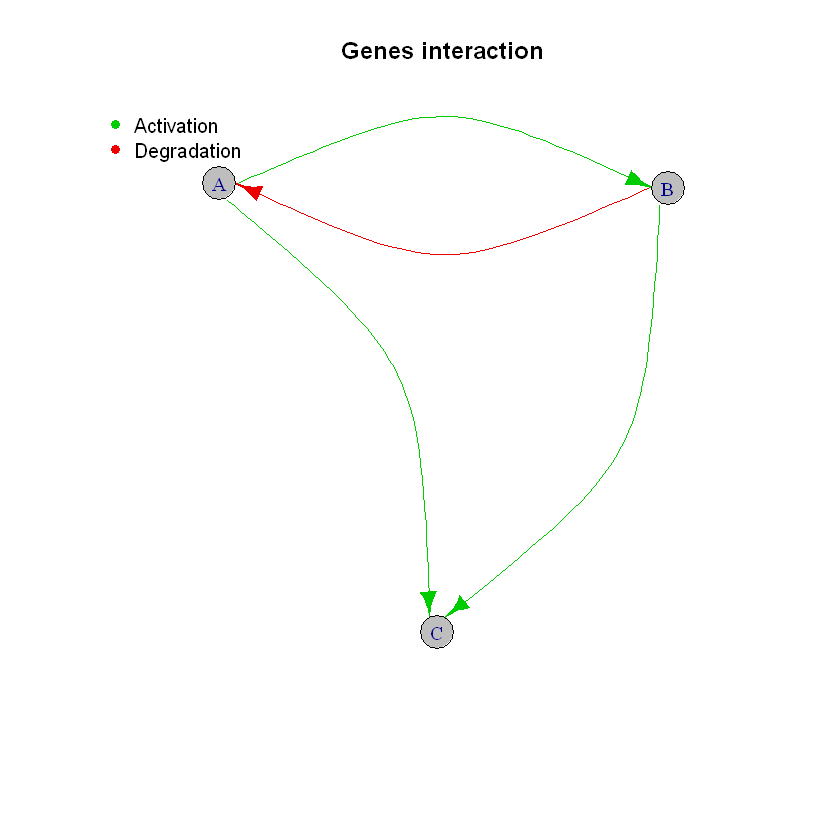

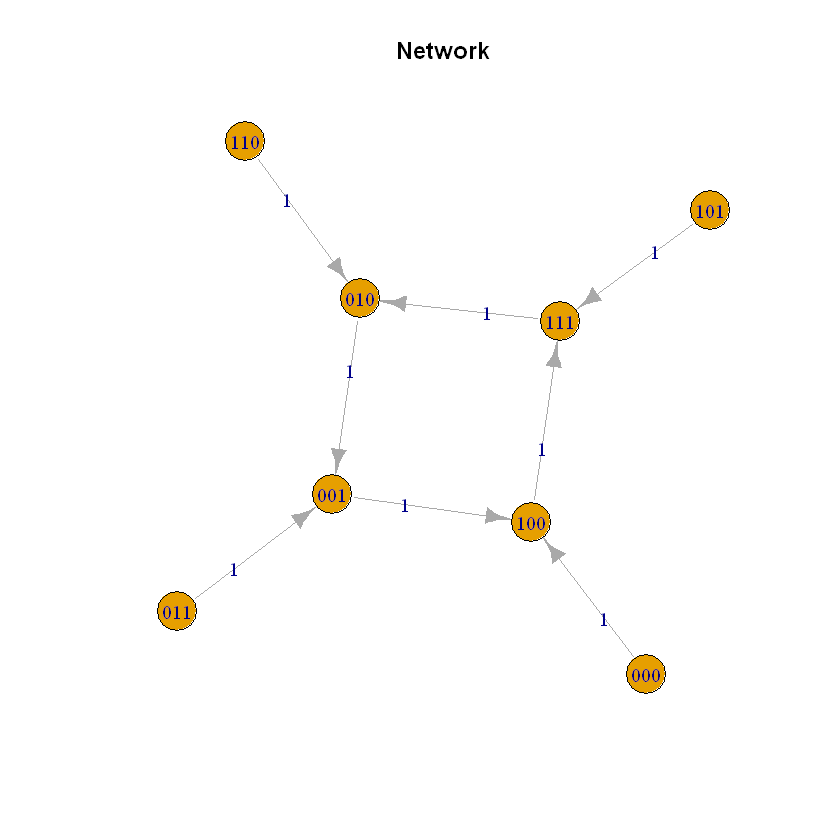

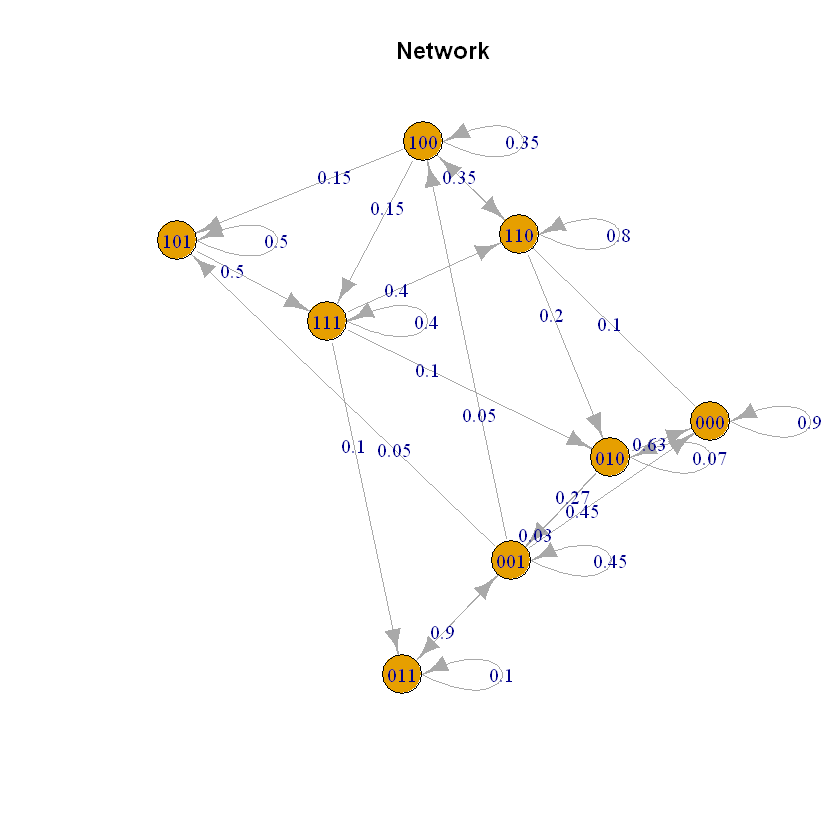

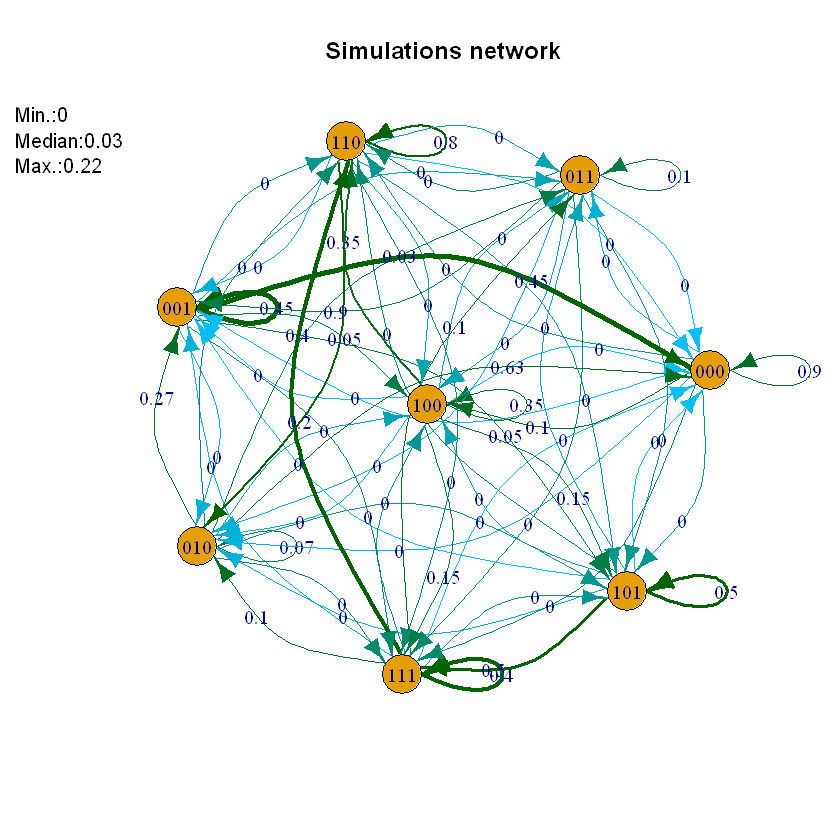

In [22]:
#Here is generated the fixed states, the states with probabilities
#and the simulations

test=complete_simulation(input_gen_list)